In [1]:
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib
import random
import os
import argparse
from sklearn.metrics import precision_recall_curve

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

dnase_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/DNASE_SE/GM12878/nautilus_runs/GM12878_03.06.2022_bias_128_4_1234_0.8_fold_0/dsqtl_preds/snp_scores.tsv"
atac_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/nautilus_runs/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/dsqtl_preds/snp_scores.tsv"
atac_preds_250m="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/subsampling/GM12878_250M/dsqtl_preds/snp_scores.tsv"
atac_preds_100m="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/subsampling/GM12878_100M/dsqtl_preds/snp_scores.tsv"
atac_preds_50m="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/subsampling/GM12878_50M/dsqtl_preds/snp_scores.tsv"
atac_preds_25m="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/subsampling/GM12878_25M/dsqtl_preds/snp_scores.tsv"
atac_preds_5m="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/subsampling/GM12878_5M/dsqtl_preds/snp_scores.tsv"



In [2]:
def fetch_auprc(preds):
    dsqtls = pd.read_csv(preds,sep="\t", header=0, index_col=False)
    dsqtls[['gkm_SVM','kmer_SVM','abs_gkm_SVM','abs_kmer_SVM','CADD','GWAVA_region','GWAVA_tss','GWAVA_unmatched','GERP','label']] = dsqtls['META_DATA'].str.split(",", expand=True)
    dsqtls["label"] = dsqtls["label"].astype(int)
    fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(dsqtls["label"], abs(dsqtls["log_probs_diff_abs_sum"]))
    roc_auc = metrics.average_precision_score(dsqtls["label"], abs(dsqtls["log_probs_diff_abs_sum"]))
    return roc_auc
    
    
    

In [3]:
roc_500m = fetch_auprc(atac_preds)
roc_250m = fetch_auprc(atac_preds_250m)
roc_100m = fetch_auprc(atac_preds_100m)
roc_50m = fetch_auprc(atac_preds_50m)
roc_25m = fetch_auprc(atac_preds_25m)
roc_5m = fetch_auprc(atac_preds_5m)
roc_dnase = fetch_auprc(dnase_preds)


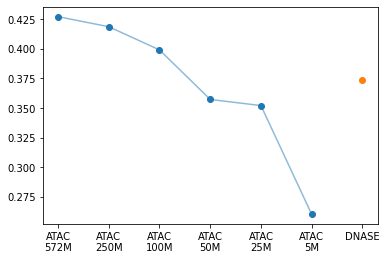

In [4]:
plt.scatter(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M" ,"ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],[roc_500m,roc_250m,roc_100m,roc_50m,roc_25m,roc_5m])
plt.plot(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M","ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],[roc_500m,roc_250m,roc_100m,roc_50m,roc_25m,roc_5m], alpha=0.5)
plt.scatter(["DNASE"], [roc_dnase])
plt.savefig("subfigs/subsample_profile_performance.pdf", transparent=True, dpi=300)





In [5]:
def fetch_auprc(preds):
    dsqtls = pd.read_csv(preds,sep="\t", header=0, index_col=False)
    dsqtls[['gkm_SVM','kmer_SVM','abs_gkm_SVM','abs_kmer_SVM','CADD','GWAVA_region','GWAVA_tss','GWAVA_unmatched','GERP','label']] = dsqtls['META_DATA'].str.split(",", expand=True)
    dsqtls["label"] = dsqtls["label"].astype(int)
    fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(dsqtls["label"], abs(dsqtls["log_counts_diff"]))
    roc_auc = metrics.average_precision_score(dsqtls["label"], abs(dsqtls["log_counts_diff"]))
    return roc_auc
    
    

In [6]:
roc_500m = fetch_auprc(atac_preds)
roc_250m = fetch_auprc(atac_preds_250m)
roc_100m = fetch_auprc(atac_preds_100m)
roc_50m = fetch_auprc(atac_preds_50m)
roc_25m = fetch_auprc(atac_preds_25m)
roc_5m = fetch_auprc(atac_preds_5m)
roc_dnase = fetch_auprc(dnase_preds)


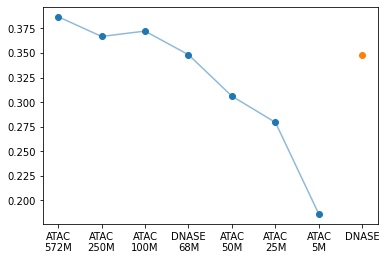

In [7]:
plt.scatter(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M", "DNASE\n68M" ,"ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],[roc_500m,roc_250m,roc_100m,roc_dnase,roc_50m,roc_25m,roc_5m])
plt.plot(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M", "DNASE\n68M" ,"ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],[roc_500m,roc_250m,roc_100m,roc_dnase,roc_50m,roc_25m,roc_5m], alpha=0.5)
plt.scatter(["DNASE"], [roc_dnase])

plt.savefig("subfigs/subsample_counts_performance.pdf", transparent=True, dpi=300)


